# MÁSTER UNIVERSITARIO EN CIENCIAS ACTUARIALES Y FINANCIERAS 
## RENTA VARIABLE Y DERIVADOS FINANCIEROS
### Práctica 5. Paridad Put-Call
#### Desarrollar el siguiente modelo en Python:
#### - Ha de crear un modelo que permita calcular la fórmula de la paridad Put-Call en opciones europeas de la misma serie. 
#### - Establecer un sistema gráfico que explique la fórmula de la paridad Put-Call.
#### - Establecer el desarrollo analítico (ecuaciones) que explique la fórmula de la paridad Put-Call.
#### - Estudiar el caso en el que no se cumpla la fórmula de la paridad Put-Call al comparar los valores teóricos con los del mercado y ver la posibilidad de que se den oportunidades de arbitraje.

Se crea un modelo para calcular el valor teórico de la call, comprobar si se cumple o no la paridad Put-Call y en caso de que no se cumpla y haya posibilidad de arbitraje, conocer en qué debiera consistir la estrategia

In [ ]:
#Importación librerías
import numpy as np

### DATOS
s = 95 #Spot
e = 110 #Strike
p = 12 #Valor de la Put
t = 1 #Periodo (años)
int = 0.1 #Interés anual
c_mdo = 10 #Valor de la Call de mercado

### CÁLCULOS
b_tn = e #Bono en el momento de vencimiento
b_t0 = round(b_tn/(1+int)**t,2) #Bono en el momento de vencimiento
r = np.log(1+int) #Interés (tanto instantáneo)

### CÁLCULO DEL VALOR TEÓRICO DE LA CALL
c_teo = s + p - e * np.exp(-r*t)
paridad = c_mdo == c_teo

### ESTRATEGIAS DE ARBITRAJE
if paridad:
  estrategia = 'No existe estrategia de arbitraje'
  comprar = 'no aplica'
  vender = 'no aplica'
else:
  estrategia = 'Existe estrategia de arbitraje'
  if (c_mdo+b_t0)<(s+p):
    comprar = 'call + bono'
    vender = 'put + accion'
  else:
    comprar = 'put + accion'
    vender = 'call + bono'

# Resultados de la simulación (se muestran los primeros 15 valores)
print(f"""
{'-'*40}
Valor de la Call mercado: {c_mdo}
Valor de la Call teórica: {c_teo}
Se cumple la paridad P-C: {paridad}
¿Existe estrategia de arbritraje?: {estrategia}
Estrategia, hay que comprar: {comprar}
Estrategia, hay que vender: {vender}
{'-'*40}
""")


----------------------------------------
Valor de la Call mercado: 10
Valor de la Call teórica: 7.0
Se cumple la paridad P-C: False
¿Existe estrategia de arbritraje?: Existe estrategia de arbitraje
Estrategia, hay que comprar: put + accion
Estrategia, hay que vender: call + bono
----------------------------------------



# Desarrollo análitico
1º F + B = S --> Futuro + Bono = Contado

2º Considerando qu el Futuro viene de una Call comprada y una Put vendida:
F = C - P

3º Sustiuyendo:
C - P + B = S --> Call - Put + Bono = Spot

4º Considerando que el Bono es un cupón cero cuyo nominal es igual al precio de ejercicio de las opciones (E=B), pero como E es el precio a vencimiento (t=n) y el precio del Bono es en el momento actual (en t=0), por lo que se debe descontar el strike (E):

5º C - P + E/(1+i)^n = S

6º Si se pasa a tanto instantáneo, quedaría:
C - P + E · e-rt = S

7º Por lo que, se llega a la fórmula de la paridad Put-Call:
**C + E · e-rt = S + P**

Sistema gráfico para interpretar la fórmula de la paridad Put-Call


----------------------------------------
Precio Spot sim.: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Beneficio call  : [-4. -4. -4. -4. -4. -4. -4. -4. -4. -4.]
Beneficio put   : [-16. -15. -14. -13. -12. -11. -10.  -9.  -8.  -7.]
Beneficio bono  : [20. 20. 20. 20. 20. 20. 20. 20. 20. 20.]
Beneficio futuro: [-20. -19. -18. -17. -16. -15. -14. -13. -12. -11.]
Beneficio total : [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
----------------------------------------



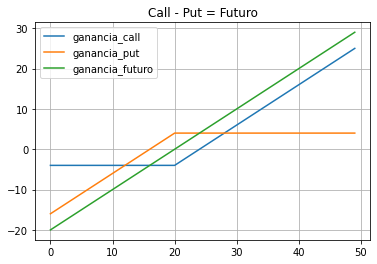

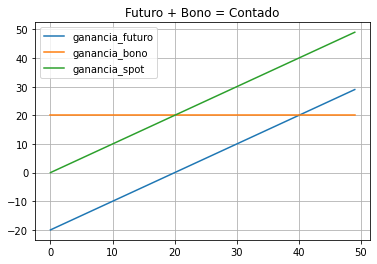

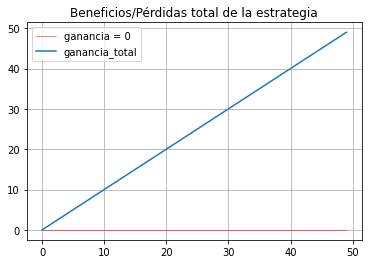

In [17]:
#Importación librerías
import numpy as np
import matplotlib.pyplot as plt

### SELECCIÓN DE LA ESTRATEGIA
# indicar:
#         1 --> si se decide comprar call y vender put
#         2 --> si se decide vender call y comprar put
opcion = 1

### DATOS
# Cantidad de títulos
q = 1
# Precios strike de cada opción (call y put) y valor del bono
#(tiene que ser la misma para la compra y venta y para el bono)
e = 20
# Prima de cada opción (call y put)
#(tiene que ser la misma para la compra y venta)
p = 4
# Datos para las simulaciones de precio spot
s_min = 0 #spot mínimo
n_sim = 50 #número de simulaciones
ampl = 1 #amplitud del rango

### CÁLCULO DE PARÁMETROS FIJOS

#posiciones en cada opción
if opcion == 1:
  call = "compra"
  put = "venta"
else:
  call = "venta"
  put = "compra"

### SIMULACIONES

#se crean los vectores para las simulaciones
s_sim = np.zeros(n_sim)
b_call = np.zeros(n_sim)
b_put = np.zeros(n_sim)
b_futuro = np.zeros(n_sim)
b_bono = np.zeros(n_sim)
b_total = np.zeros(n_sim)

#Simulacion de beneficios/pérdidas
for i in range(0, n_sim):

    if i == 0:
      s_sim[i] = s_min
    else:
      s_sim[i] = s_sim[i-1] + ampl
    
    if call == "compra":
      b_call[i] = max(0,s_sim[i]-e) - p
    else:
      b_call[i] = -(max(0,s_sim[i]-e)) + p

    if put == "compra":
      b_put[i] = max(0,e-s_sim[i]) - p
    else:
      b_put[i] = -(max(0,e-s_sim[i])) + p
    
    b_bono[i] = e

b_call = q * b_call
b_put = q * b_put
b_futuro = q * (b_call + b_put)
b_total = q * (b_futuro + b_bono)

# Resultados de la simulación (se muestran los primeros 10 valores)
print(f"""
{'-'*40}
Precio Spot sim.: {s_sim[:10]}
Beneficio call  : {b_call[:10]}
Beneficio put   : {b_put[:10]}
Beneficio bono  : {b_bono[:10]}
Beneficio futuro: {b_futuro[:10]}
Beneficio total : {b_total[:10]}
{'-'*40}
""")

# Visualización gráfica de futuro = call - put
plt.title('Call - Put = Futuro')
#plt.plot(s_sim, np.zeros(n_sim), label = "ganancia = 0", color="red", linewidth=0.5)
plt.plot(s_sim, b_call, label = "ganancia_call")
plt.plot(s_sim, b_put, label = "ganancia_put")
plt.plot(s_sim, b_futuro, label = "ganancia_futuro")
plt.grid()
plt.legend(loc="best")
plt.show()

# Visualización gráfica de futuro + bono = contado
plt.title('Futuro + Bono = Contado')
#plt.plot(s_sim, np.zeros(n_sim), label = "ganancia = 0", color="red", linewidth=0.5)
plt.plot(s_sim, b_futuro, label = "ganancia_futuro")
plt.plot(s_sim, b_bono, label = "ganancia_bono")
plt.plot(s_sim, b_total, label = "ganancia_spot")
plt.grid()
plt.legend(loc="best")
plt.show()

# Visualización gráfica de la estrategia total
plt.title('Beneficios/Pérdidas total de la estrategia')
plt.plot(s_sim, np.zeros(n_sim), label = "ganancia = 0", color="red", linewidth=0.5)
plt.plot(s_sim, b_total, label = "ganancia_total")
plt.grid()
plt.legend(loc="best")
plt.show()
